#### My Questions

    - What's the relationship between age started coding and salary
    - What's the relationship between years coded and salary
    - What's the relationship between years coded professionally and salary

## Gather

In [26]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./2020_survey_results_public.csv')
schema = pd.read_csv('./2020_survey_results_schema.csv')



In [27]:
#taking a look at the data to understand it's structure
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [28]:
#using the schema file to understand all the different categories in the data
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


## Assess

Here I will be looking at the head(), shape and distribution (via bar chart) of three categories: Age1stCode, YearsCode, and YearsCodePro

In [29]:
#First, I want to get an understanding of how many different ages we're dealing with here and where most of the responses are
Age1stCode = df.Age1stCode.value_counts()
Age1stCode.head()

15    5618
14    5514
16    5463
18    5382
12    5081
Name: Age1stCode, dtype: int64

In [5]:
#And I want to take a look at how many values there are total
Age1stCode.shape

(63,)

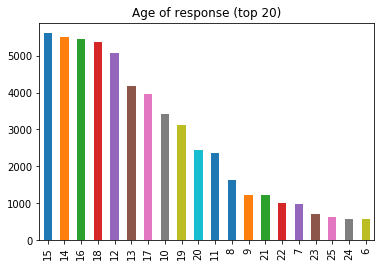

In [6]:
#A bar chart to show the distribution
(Age1stCode[:20]).plot(kind="bar");
plt.title("Age of response (top 20)");

In [7]:
#Same process for the YearsCode column (for the years the respondent has been coding for)
YearsCode = df.YearsCode.value_counts()
YearsCode.head()

10    4510
5     4249
6     3834
7     3477
8     3407
Name: YearsCode, dtype: int64

In [8]:
YearsCode.shape

(52,)

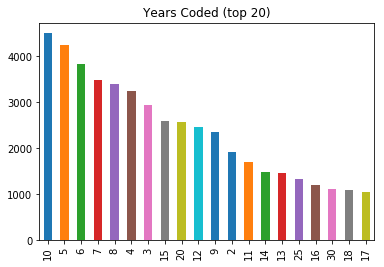

In [9]:
(YearsCode[:20]).plot(kind="bar");
plt.title("Years Coded (top 20)");

In [10]:
#repeating the process for YearsCodePro (number of years the respondent has coded professionally)
YearsCodePro = df.YearsCodePro.value_counts()
YearsCodePro.head()

3    4815
2    4814
5    3978
4    3716
1    2818
Name: YearsCodePro, dtype: int64

In [11]:
YearsCodePro.shape

(52,)

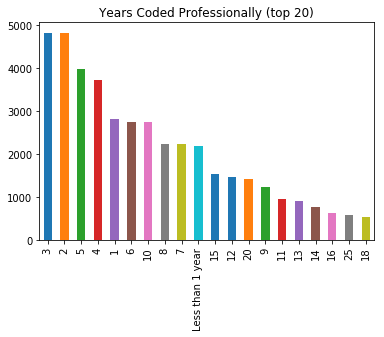

In [12]:
(YearsCodePro[:20]).plot(kind="bar");
plt.title("Years Coded Professionally (top 20)");

## Clean

##### Age1stCode

In [30]:
#first removing all the files with no value for the age they first coded or their salary converted to USD
df_no_na_Age1st = df.dropna(subset=['Age1stCode', 'ConvertedComp'], axis=0)

df_no_na_Age1st.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20


In [31]:
#We won't be able to make a scatter plot unless all the values are numerical
#So I'll change the values with letters in them into numbers
df_no_na_Age1st.loc[(df.Age1stCode == 'Younger than 5 years'),'Age1stCode'] = 4 
df_no_na_Age1st.loc[(df.Age1stCode == 'Older than 85'),'Age1stCode'] = 86

C:\Users\Matthew\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [32]:
#Let's check what kind of type this column is
print(df_no_na_Age1st['Age1stCode'].dtypes)

object


In [33]:
#object, not what we want
#I'll convert it to numeric
df_no_na_Age1st['Age1stCode'] = df_no_na_Age1st['Age1stCode'].apply(pd.to_numeric)

<ipython-input-33-c7a2735bc138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_Age1st['Age1stCode'] = df_no_na_Age1st['Age1stCode'].apply(pd.to_numeric)


In [34]:
#check to make sure it worked
print(df_no_na_Age1st['Age1stCode'].dtypes)

int64


In [35]:
#bingo
#now group the averages by the age the respondent first coded
avgAge1st = df_no_na_Age1st.groupby('Age1stCode', as_index=False).mean()
#now we'll drop unneeded columns
avgAge1st = avgAge1st[['Age1stCode','ConvertedComp']]
avgAge1st

,Age1stCode,ConvertedComp
0,4,147609.704545
1,5,127005.827957
2,6,132579.679775
3,7,153738.730579
4,8,142578.044976
5,9,129845.326949
6,10,122609.227750
7,11,115159.382373
8,12,114577.132127
9,13,114304.774887


Text(0.5, 1.0, 'Age / Salary')

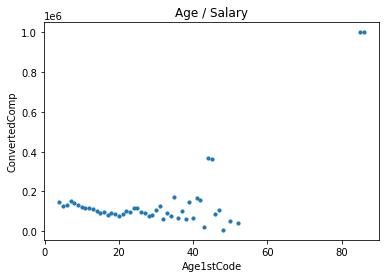

In [36]:
# the values for 85 and 84 are clear outliers. Let's graph it for illustration.

avgAge1st.plot(x='Age1stCode', y='ConvertedComp', s=10, kind="scatter");
plt.title("Age / Salary")

In [37]:
#84 and 85 throw off the whole graph, how many values are there for those ages?
over_85 = df_no_na_Age1st[df_no_na_Age1st["Age1stCode"] >= 84]
over_85

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
2625,2638,I am a developer by profession,No,99.0,86,Yearly,1.000000e+49,1000000.0,Canada,Canadian dollar,...,Difficult,Too short,NaN,"Computer science, computer engineering, or sof...",Angular;ASP.NET Core,Angular;ASP.NET Core,Somewhat less welcome now than last year,40.0,More than 50 years,More than 50 years
6964,6993,"I am not primarily a developer, but I write co...",Yes,NaN,86,Monthly,4.958550e+16,1000000.0,Viet Nam,Vietnamese dong,...,Difficult,Appropriate in length,NaN,"Information systems, information technology, o...",NaN,NaN,NaN,160.0,More than 50 years,More than 50 years
35676,35835,I am a developer by profession,Yes,NaN,85,Weekly,9.698609e+08,1000000.0,Colombia,Netherlands Antillean guilder,...,NaN,NaN,NaN,NaN,Ruby on Rails,Ruby on Rails,NaN,NaN,50,45
42328,43070,I am a developer by profession,Yes,NaN,86,Weekly,1.111111e+247,1000000.0,United States,Belarusian ruble,...,Neither easy nor difficult,Too long,NaN,NaN,NaN,NaN,NaN,1.0,More than 50 years,More than 50 years


In [21]:
# 44 and 45 are also outliers let's take a look at those values
forty_four = df_no_na_Age1st[df_no_na_Age1st["Age1stCode"] == 44]
forty_five = df_no_na_Age1st[df_no_na_Age1st["Age1stCode"] == 45]
forty_four

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
28110,28214,I am a developer by profession,Yes,47.0,44,Yearly,87500.0,58458.0,Australia,Australian dollar,...,Easy,Appropriate in length,No,Fine arts or performing arts (such as graphic ...,React.js;Vue.js,Vue.js,Just as welcome now as I felt last year,40.0,3,2
47807,48807,"I am not primarily a developer, but I write co...",Yes,NaN,44,Monthly,200000.0,1000000.0,New Zealand,New Zealand dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",React.js,React.js,A lot more welcome now than last year,50.0,6,Less than 1 year
50450,51490,"I am not primarily a developer, but I write co...",No,48.0,44,Monthly,200000.0,38928.0,Argentina,Argentine peso,...,Easy,Appropriate in length,No,"A health science (such as nursing, pharmacy, r...",NaN,NaN,Just as welcome now as I felt last year,70.0,4,4


In [22]:
forty_five

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
1581,1589,"I am not primarily a developer, but I write co...",No,59.0,45,Weekly,94000.0,2000000.0,United States,United States dollar,...,Easy,Appropriate in length,No,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,14,14
17020,17080,I am a developer by profession,No,45.0,45,Monthly,8000.0,21996.0,Brazil,Brazilian real,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",jQuery;React.js;Spring;Vue.js,jQuery,Somewhat more welcome now than last year,50.0,25,21
19368,19442,I am a developer by profession,Yes,49.0,45,Yearly,125000.0,125000.0,United States,United States dollar,...,Easy,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,40.0,2,1
33918,34042,"I am not primarily a developer, but I write co...",No,50.0,45,Yearly,120000.0,80172.0,Australia,Australian dollar,...,Easy,Too long,No,"A health science (such as nursing, pharmacy, r...",NaN,NaN,Just as welcome now as I felt last year,35.0,5,5
41018,41664,I am a developer by profession,Yes,49.0,45,Yearly,28644.0,30964.0,Spain,European Euro,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",Django;Spring,Spring,Just as welcome now as I felt last year,48.0,3,Less than 1 year
46929,47913,I am a developer by profession,Yes,45.0,45,Monthly,18000.0,219564.0,Switzerland,Swiss franc,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,jQuery,Just as welcome now as I felt last year,45.0,31,23
55305,56420,"I am not primarily a developer, but I write co...",No,54.0,45,Yearly,60000.0,64859.0,Spain,European Euro,...,Easy,Too long,No,"A business discipline (such as accounting, fin...",NaN,NaN,Just as welcome now as I felt last year,60.0,5,Less than 1 year


In [23]:
#so it's pretty clear those making over a million dollars a year salary are throwing the numbers off.
#we'll remove the troubesome items in 44 and 45 and dropping 85 and 86 entirely
df_no_na_Age1st = df_no_na_Age1st.drop([1581,47807])
avgAge1st = df_no_na_Age1st.groupby('Age1stCode', as_index=False).mean()
avg_clean = avgAge1st.drop([47,48])

In [24]:
#dropping other values
avg_clean = avg_clean[['Age1stCode','ConvertedComp']]
#making sure 85 and 86 are removed
avg_clean.tail()

,Age1stCode,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
42,46,53710.000000,46.0,85000.0,85000.000000,55.000000
43,47,31549.000000,70.0,107000.0,107000.000000,35.000000
44,48,12561.000000,48.0,2500000.0,6859.000000,72.000000
45,50,27670.666667,59.0,39400.0,51133.333333,33.333333
46,52,12145.000000,NaN,50000000.0,41919.000000,NaN


Text(0.5,1,'Age / Salary')

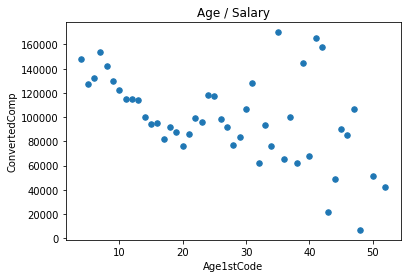

In [25]:
# a quick scatter plot to see the results
avg_clean.plot(x='Age1stCode', y='ConvertedComp', s=30, kind="scatter");
plt.title("Age / Salary")

##### YearsCode

In [26]:
#first removing all the files with no value for the the years they've been coding or their salary converted to USD
df_no_na_YearsCode = df.dropna(subset=['YearsCode', 'ConvertedComp'], axis=0)
df_no_na_YearsCode.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20


In [27]:
#same process for years code, change the string values into numeric values
df_no_na_YearsCode.loc[(df.YearsCode == 'Less than 1 year'),'YearsCode'] = 0.1
df_no_na_YearsCode.loc[(df.YearsCode == 'More than 50 years'),'YearsCode'] = 51

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
df_no_na_YearsCode['YearsCode'] = df_no_na_YearsCode['YearsCode'].apply(pd.to_numeric)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
avgYearsCode = df_no_na_YearsCode.groupby('YearsCode', as_index=False).mean()

avgYearsCode = AvgYearsCode[['YearsCode','ConvertedComp']]
avgYearsCode.head()

NameError: name 'df_no_na_YearsCode' is not defined

Text(0.5,1,'Years Coded / Salary')

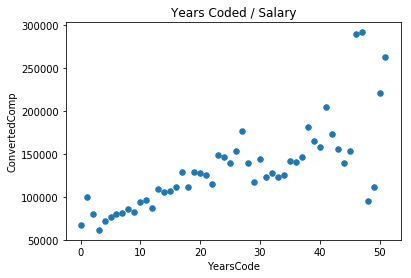

In [30]:
avgYearsCode.plot(x='YearsCode', y='ConvertedComp', s=30, kind="scatter");
plt.title("Years Coded / Salary")

##### YearsCodePro

In [31]:
#first removing all the files with no value for the years they've been coding professionally or their salary in USD
df_no_na_YearsPro = df.dropna(subset=['YearsCodePro', 'ConvertedComp'], axis=0)
df_no_na_YearsPro.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20


In [32]:
#same process for yearscodepro
df_no_na_YearsPro.loc[(df.YearsCodePro == 'Less than 1 year'),'YearsCodePro'] = 0.1
df_no_na_YearsPro.loc[(df.YearsCodePro == 'More than 50 years'),'YearsCodePro'] = 51

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
df_no_na_YearsPro['YearsCodePro'] = df_no_na_YearsPro['YearsCodePro'].apply(pd.to_numeric)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
avgYearsPro = df_no_na_YearsPro.groupby('YearsCodePro', as_index=False).mean()
avgYearsPro = avgYearsPro[['YearsCodePro','ConvertedComp']]
avgYearsPro.head()

,YearsCodePro,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
0,0.1,32898.484890,25.465323,6.868132e+32,71429.787088,39.367155
1,1.0,31110.104029,25.360763,5.612641e+07,66226.957165,38.516904
2,2.0,30332.336851,25.920880,1.339495e+06,73056.480605,39.958294
3,3.0,29887.741774,26.985318,2.788626e+12,80676.905745,39.728355
4,4.0,29232.527718,27.616427,1.368776e+06,83718.512599,40.342870


Text(0.5,1,'Years Coded Professionally / Salary')

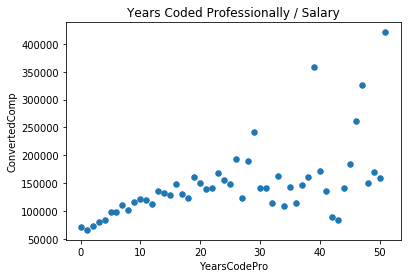

In [35]:
avgYearsPro.plot(x='YearsCodePro', y='ConvertedComp', s=30, kind="scatter");
plt.title("Years Coded Professionally / Salary")

## Analyze

In [36]:
#getting the basic description of the data for the age the respondent first coded
avg_clean.describe()

,Age1stCode,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,47.000000,47.000000,46.000000,4.700000e+01,47.000000,46.000000
mean,27.063830,29142.940762,38.933533,3.516793e+145,98920.420514,42.544747
std,13.822484,6774.945248,8.289599,2.410992e+146,35606.703372,6.990292
min,4.000000,7576.750000,30.152133,1.192500e+04,6859.000000,33.333333
25%,15.500000,28031.776882,32.776749,2.079837e+05,79703.083970,40.193699
50%,27.000000,29815.090287,35.646881,1.305178e+06,96229.123487,40.794162
75%,38.500000,30964.948099,44.229167,5.815105e+06,120320.429664,41.756061
max,52.000000,53710.000000,70.000000,1.652893e+147,170068.027778,72.000000


In [37]:
#the basic description for the data of the amount of years the respondent coded
avgYearsCode.describe()

,YearsCode,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000
mean,25.501923,29102.683149,41.624877,4.109139e+243,133304.815713,41.223362
std,15.151464,2505.576281,12.481178,inf,50627.374154,2.286698
min,0.100000,18887.250000,26.076747,1.031000e+05,61442.297242,32.937500
25%,12.750000,28418.044013,29.653922,3.719372e+05,98968.688329,40.399912
50%,25.500000,29197.410382,40.286353,1.125966e+06,126665.104509,41.446235
75%,38.250000,30075.856181,51.214472,3.889293e+06,149443.451038,42.037974
max,51.000000,36525.800000,68.674419,2.136752e+245,291831.588235,48.142857


In [38]:
#looking at the description of the the average years the respondent coded professionally
avgYearsPro.describe()

,YearsCodePro,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000
mean,25.501923,28905.846876,47.894647,1.017501e+244,149179.415121,41.987901
std,15.151464,5493.954167,14.157093,inf,67510.956071,5.237028
min,0.100000,9550.500000,25.360763,6.566667e+04,66226.957165,31.000000
25%,12.750000,27449.293523,35.793485,1.722468e+05,114084.565273,40.548805
50%,25.500000,28916.699212,48.476320,7.217923e+05,140852.020327,41.375176
75%,38.250000,29850.289509,59.145833,3.057658e+06,160704.903149,42.540533
max,51.000000,46803.200000,77.214286,5.291005e+245,420725.380952,72.600000


In [39]:
#full breakdown for the averages by the age the respondent first started coding
avg_clean

,Age1stCode,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
0,4,29893.153409,33.314103,5.681818e+53,147609.704545,41.648148
1,5,28392.887097,35.346405,1.912540e+05,127005.827957,40.145714
2,6,28794.865169,35.132822,4.424553e+06,132579.679775,42.245000
3,7,28722.084298,35.924632,1.652893e+147,153738.730579,40.310580
4,8,30034.392344,35.600430,8.958403e+06,142578.044976,41.075690
5,9,29815.090287,35.068285,1.368247e+10,129845.326949,40.935674
6,10,28717.308991,34.367127,5.400713e+05,122609.227750,41.518306
7,11,28830.582235,32.214668,1.546068e+06,115159.382373,40.524573
8,12,29079.153243,32.912672,2.229279e+06,114577.132127,40.656359
9,13,29475.882353,31.798258,1.305178e+06,114304.774887,40.902789


In [46]:
#breakdown of the ful data for the averages by the years the respondent had been coding
avgYearsCode

,YearsCode,Respondent,Age,Age1stCode,CompTotal,ConvertedComp,WorkWeekHrs
0,0.1,33413.740741,29.333333,21.259259,2.283792e+07,67406.481481,37.595890
1,1.0,32635.050251,27.591716,21.211055,4.838336e+07,101557.050251,42.138021
2,2.0,30028.345238,27.912736,20.632937,1.984127e+33,80905.531746,40.506186
3,3.0,30767.941237,27.083960,19.601031,1.144139e+06,61814.862887,39.475998
4,4.0,31316.981206,26.464451,18.117463,9.553667e+05,71684.429914,39.613081
5,5.0,30853.084008,26.451811,17.605769,5.060782e+12,76383.076417,39.530242
6,6.0,29775.160180,26.076037,16.811377,4.485444e+27,80447.761976,39.451816
7,7.0,29688.113886,26.481928,16.515984,1.654750e+06,81346.359141,40.097719
8,8.0,29424.312951,26.774617,16.148772,1.036204e+06,85998.274916,40.254938
9,9.0,30181.902551,27.148818,15.870504,6.540222e+146,82655.916939,40.452549


In [40]:
#breakdown of the ful data for the averages by the years the respondent had been coding professionally
avgYearsPro

,YearsCodePro,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
0,0.1,32898.484890,25.465323,6.868132e+32,71429.787088,39.367155
1,1.0,31110.104029,25.360763,5.612641e+07,66226.957165,38.516904
2,2.0,30332.336851,25.920880,1.339495e+06,73056.480605,39.958294
3,3.0,29887.741774,26.985318,2.788626e+12,80676.905745,39.728355
4,4.0,29232.527718,27.616427,1.368776e+06,83718.512599,40.342870
5,5.0,29780.480093,29.013468,3.149012e+06,98309.865295,41.186389
6,6.0,28571.455556,29.801848,4.161495e+27,99132.467593,41.131779
7,7.0,29682.337550,30.566902,2.267835e+06,110558.740081,41.459220
8,8.0,28547.770154,31.590822,1.238409e+06,101383.430532,40.443052
9,9.0,28738.044239,31.800347,1.028807e+147,116420.177984,41.417019


## Model

In [41]:
# getting the values for the line of best fit for the age first coded scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_clean['Age1stCode'],avg_clean['ConvertedComp'])

print("Equation: y={0:.1f}x+{1:.1f}".format(slope,intercept))
print('Correlation Coefficien: r=',r_value, sep='')

Equation: y=-1222.1x+131995.7
Correlation Coefficien: r=-0.474426066421


In [42]:
# getting the values for the line of best fit for the total years coded scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(avgYearsCode['YearsCode'],avgYearsCode['ConvertedComp'])

print("Equation: y={0:.1f}x+{1:.1f}".format(slope,intercept))
print('Correlation Coefficien: r=',r_value, sep='')

Equation: y=2532.7x+68715.6
Correlation Coefficien: r=0.757977403361


In [43]:
# getting the values for the line of best fit for the total years coded professionally scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(avgYearsPro['YearsCodePro'],avgYearsPro['ConvertedComp'])

print("Equation: y={0:.1f}x+{1:.1f}".format(slope,intercept))
print('Correlation Coefficien: r=',r_value, sep='')

Equation: y=2546.1x+84248.3
Correlation Coefficien: r=0.571425948087


## Visualize

Text(0,0.5,'Salary (USD)')

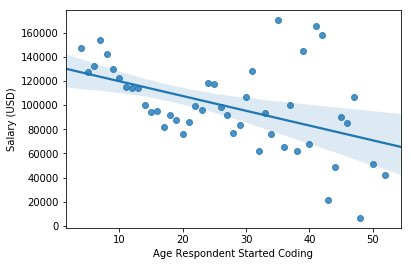

In [44]:
# Scatter plot with line of best fit for the age the respondent started coding
Age1stCodePlot = sns.regplot(avg_clean['Age1stCode'],avg_clean['ConvertedComp'])
plt.xlabel("Age Respondent Started Coding")
plt.ylabel("Salary (USD)")

Text(0,0.5,'Salary (USD)')

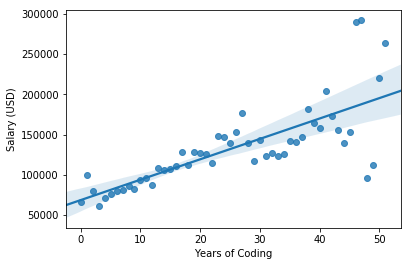

In [45]:
# Scatter plot with line of best fit for the total years the respondent coded
sns.regplot(avgYearsCode['YearsCode'],avgYearsCode['ConvertedComp'])
plt.xlabel("Years of Coding")
plt.ylabel("Salary (USD)")

Text(0,0.5,'Salary (USD)')

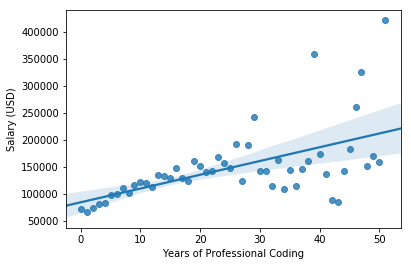

In [46]:
# Scatter plot with line of best fit for the total years the respondent coded professionally
sns.regplot(avgYearsPro['YearsCodePro'],avgYearsPro['ConvertedComp'])
plt.xlabel("Years of Professional Coding")
plt.ylabel("Salary (USD)")